# TASK 4
Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.
Accident Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
file_path="C:\\Users\\seepa\\Datasets\\RTA Dataset.csv"
df=pd.read_csv(file_path)

In [3]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [6]:
df.shape

(12316, 32)

In [7]:
# Check for missing values
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [8]:
# Fill or drop missing values (example)
df = df.dropna()  

In [45]:
#Distribution of accident severity
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     2466
Serious Injury     392
Fatal injury        31
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Accident severity')

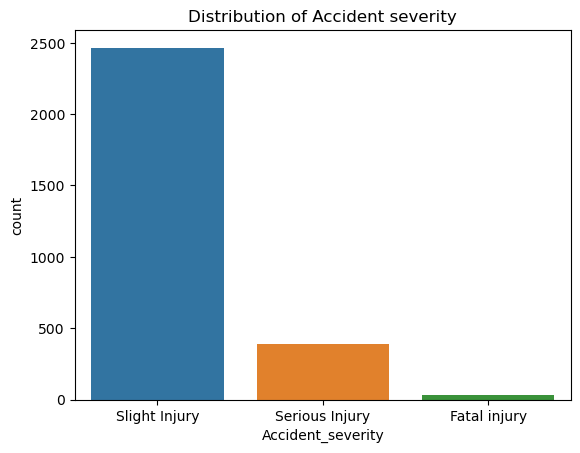

In [46]:
#plotting the final class
sns.countplot(x=df['Accident_severity'])
plt.title('Distribution of Accident severity')

In [29]:
df['Educational_level'].fillna('Unknown', inplace=True)
df['Type_of_vehicle'].fillna('Unknown', inplace=True)

In [9]:
df['Time'].head()

8     17:20:00
9     17:20:00
12    17:45:00
13    17:45:00
14    17:45:00
Name: Time, dtype: object

In [13]:
# Assuming the 'Time' column has the format 'YYYY-MM-DD HH:MM:SS'
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [16]:
print(df[df['Time'].isna()])

Empty DataFrame
Columns: [Time, Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation, Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle, Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment, Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions, Weather_conditions, Type_of_collision, Number_of_vehicles_involved, Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty, Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality, Pedestrian_movement, Cause_of_accident, Accident_severity]
Index: []

[0 rows x 32 columns]


In [17]:
df=df.dropna(subset=['Time'])

In [18]:
df['Hour']=df['Time'].dt.hour
df['Weekday']=df['Time'].dt.day_name()

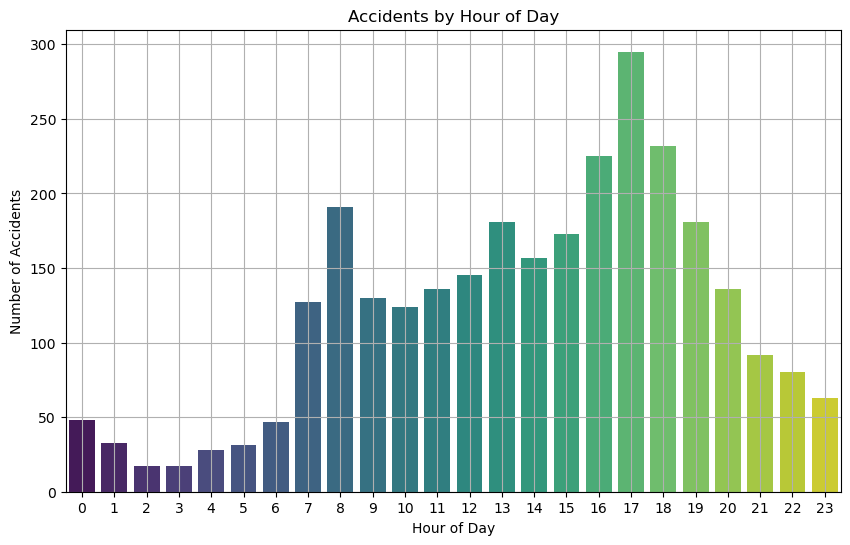

In [19]:
import numpy as np
# Aggregating data to analyze accident patterns
# Analyzing accident frequency by hour
hourly_accidents = df.groupby('Hour').size()
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values, palette="viridis")
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

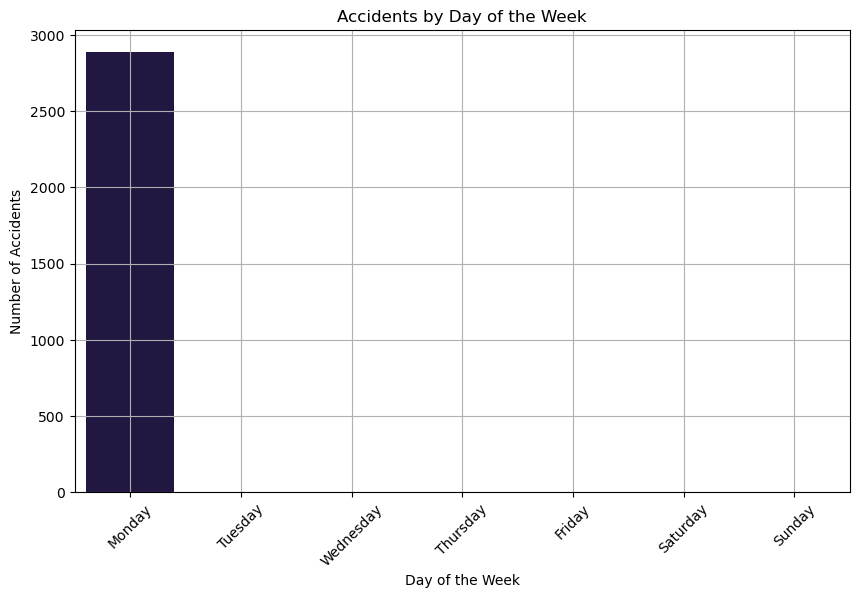

In [20]:
# Analyzing accidents by day of the week
weekday_accidents = df.groupby('Weekday').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_accidents.index, y=weekday_accidents.values, palette="magma")
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [25]:
hour_wheather_accidents=df.groupby(['Hour','Weather_conditions']).size().unstack().fillna(0)
#converting the grouped data to integers
hour_wheather_accidents=hour_wheather_accidents.astype(int)

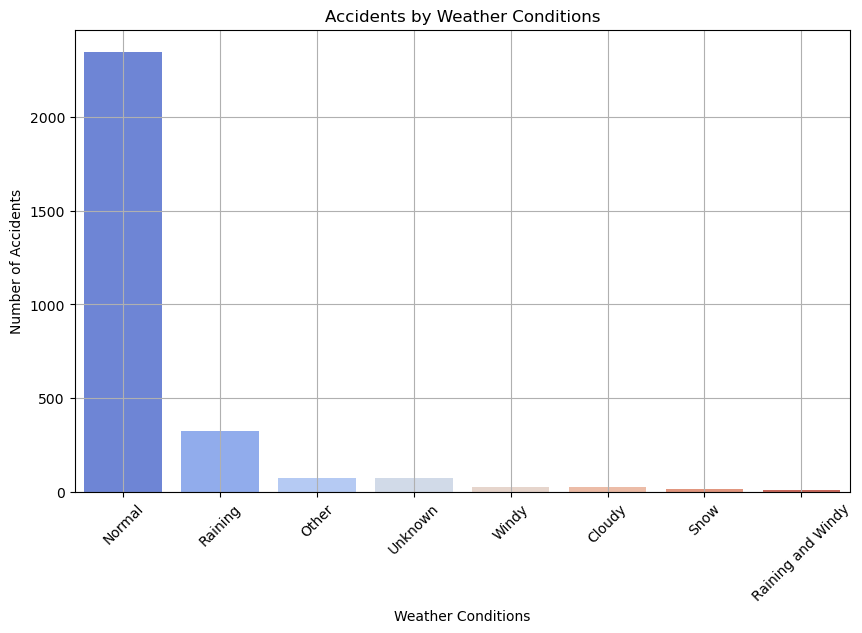

In [21]:
# Visualizing weather conditions
weather_accidents = df.groupby('Weather_conditions').size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_accidents.index, y=weather_accidents.values, palette="coolwarm")
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [28]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Hour', 'Weekday'],
      dtype='object')

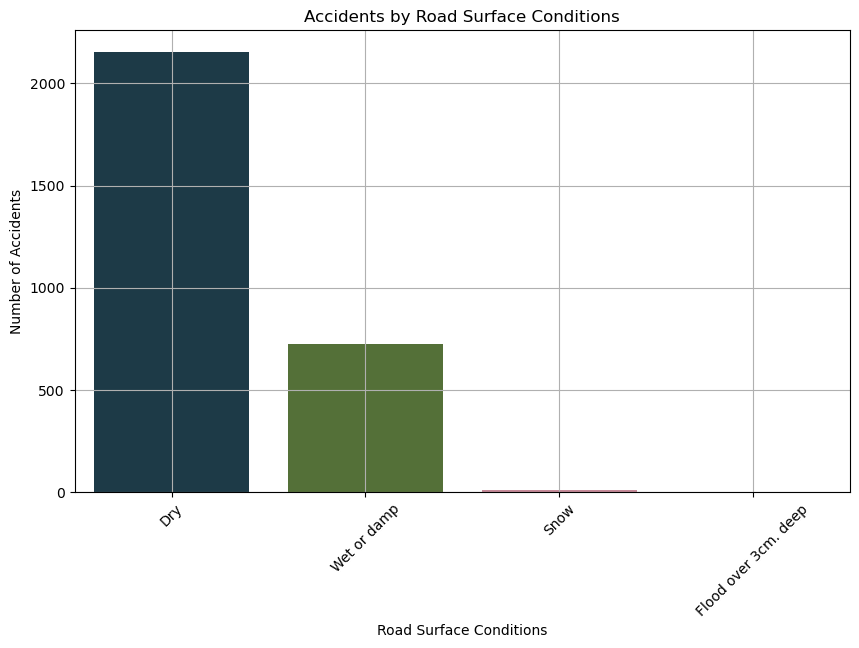

In [22]:
# Visualizing road surface conditions
road_surface_accidents = df.groupby('Road_surface_conditions').size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=road_surface_accidents.index, y=road_surface_accidents.values, palette="cubehelix")
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

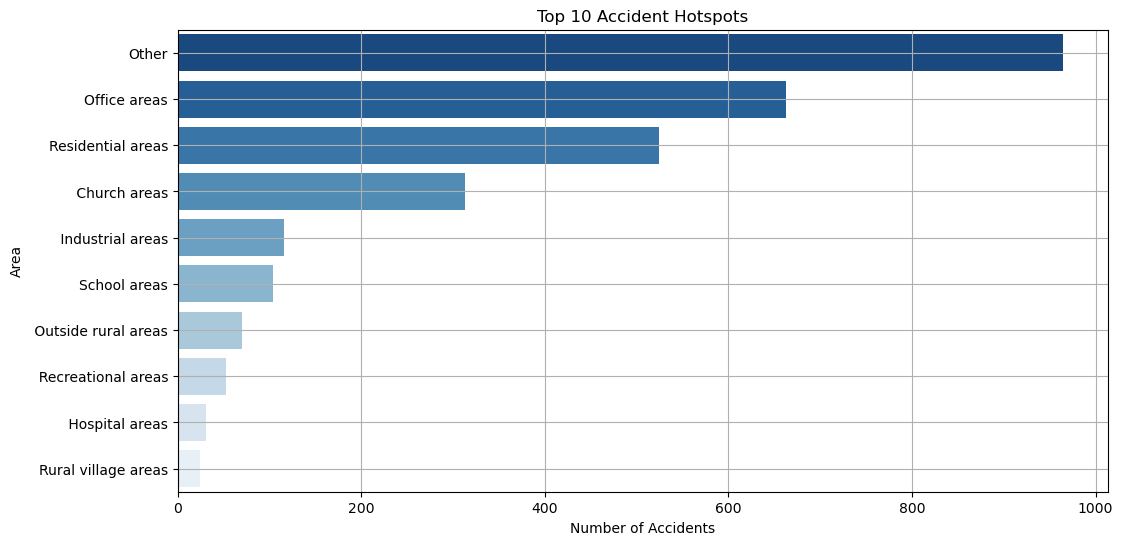

In [23]:
# Identifying accident hotspots using geographical data (if available)
if 'Area_accident_occured' in df.columns:
    area_accidents = df.groupby('Area_accident_occured').size().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=area_accidents.values, y=area_accidents.index, palette="Blues_r")
    plt.title('Top 10 Accident Hotspots')
    plt.xlabel('Number of Accidents')
    plt.ylabel('Area')
    plt.grid(True)
    plt.show()
else:
    print("Geographical data not available to visualize hotspots.")


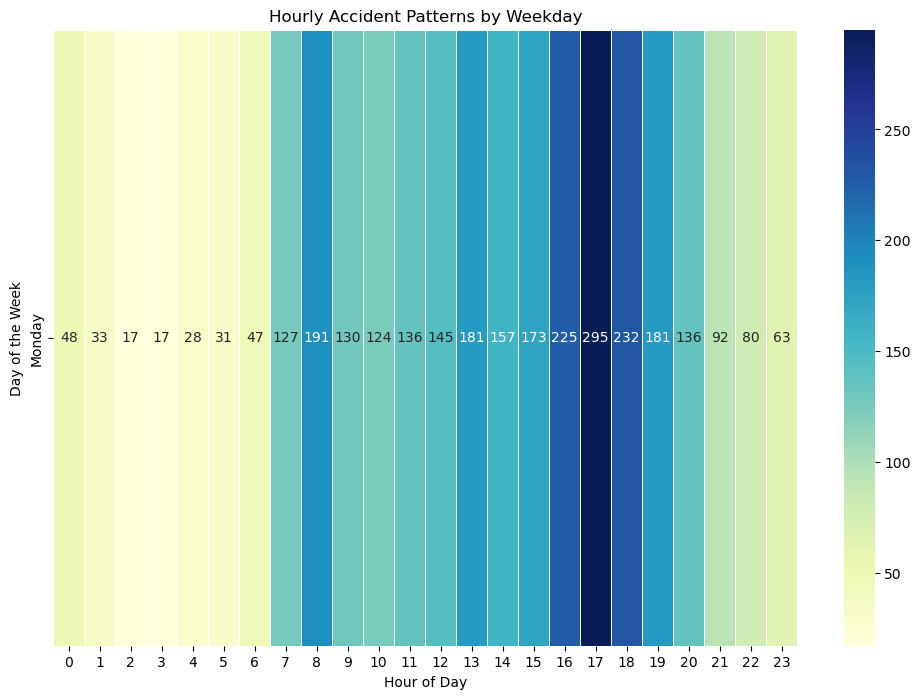

In [24]:
# Heatmap to visualize hourly patterns by weekday
hour_weekday = df.groupby(['Weekday', 'Hour']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(hour_weekday, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title('Hourly Accident Patterns by Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.show()

In [30]:
df_encoded = pd.get_dummies(df, columns=['Weather_conditions', 'Road_surface_conditions', 'Light_conditions'], drop_first=True)

In [31]:
# Selecting numerical columns for correlation analysis
numeric_columns = ['Number_of_vehicles_involved', 'Number_of_casualties', 'Hour']
df_corr = df[numeric_columns]

In [32]:
# Checking correlation
correlation_matrix = df_corr.corr()

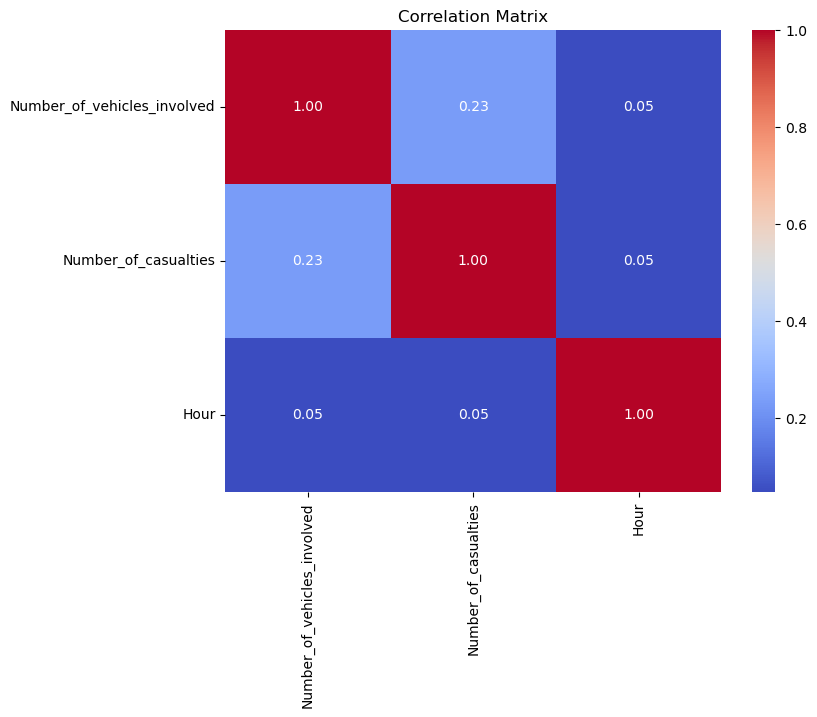

In [44]:
# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()